In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt  
import sympy as sy
from scipy.interpolate import lagrange

F = lambda t,y : 4*t*y**(0.5)


In [29]:
#revised integral deferred correction


def RIDC(a,b,N,p,K,y0,F):#Euler
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function

    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1) #stores the solution
    sol_list[0] = y0
    T = np.zeros((J,K+1))
    times = np.linspace(a,b,N+1)
    for j in range(J):
        T[j,0:K+1] = times[j*K:j*K+K+1] #times
    Y = np.zeros((J,K+1))  #approx solution
    Y1 = np.zeros((J,K+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        Y[:, 0] = sol_list[j*K]  # predictor starts w last point in j-1 interval
        for m in range(K):   #prediction
            Y[j,m+1] = Y[j,m] + h*F(T[j,m],Y[j,m]) #Eulers forward method  
            
        for l in range(1,M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(M):  
                
                g = sum([S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])

                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y1[j,m])-F(T[j,m],Y[j,m])) + h*g #solve error equation with forward Euler
            
            for m in range(M,K):
                
                g = sum([S[M-1,k]*F(T[j,m-M+k],Y[j,m-M+k]) for k in range(M+1)])
                
                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y1[j,m])-F(T[j,m],Y[j,m])) + h*g  #solve error equation with forward Euler
                    
            Y[j,:] = Y1[j,:]
    
        sol_list[j*K+1:j*K+K+1] = Y1[j,1:K+1]
        #if j!=J-1:           #set initial value for next iteration
            #Y[j+1,0] = Y1[j,K]
            
    return sol_list

K


array([1.00000000e+00, 1.00020001e+00, 1.00080016e+00, ...,
       1.00137004e+04, 1.00535881e+04, 1.00935952e+04])

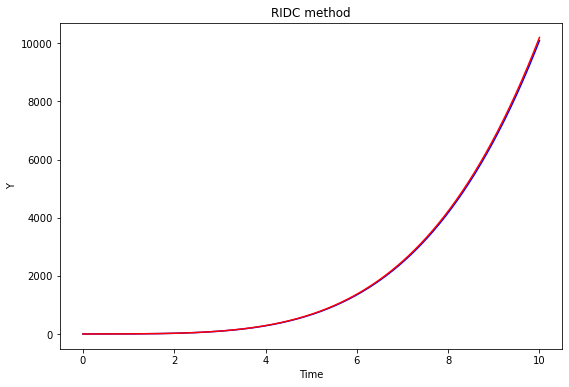

In [30]:

#K = RIDC(0,1,90,6,5,1,F)
#RIDC(a,b,N,p(M=p-1),K,y0)

T = 10.0
y0 = 1.0
p = 4  # RIDC(6,40)
M = p-1
K = 200
N = 1000

T = np.linspace(0,10,1001)
K = RIDC(0,10,1000,4,200,1,F)

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(T, K, 'b-', markersize=2)
plt.plot(T, (1+T**2)**2, 'r-', markersize=2)
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.title('RIDC method')
plt.show()

In [31]:
def func_sol(T):  #exact solution
    
    y_t = (1+T**2)**2
    
    return np.array([y_t])

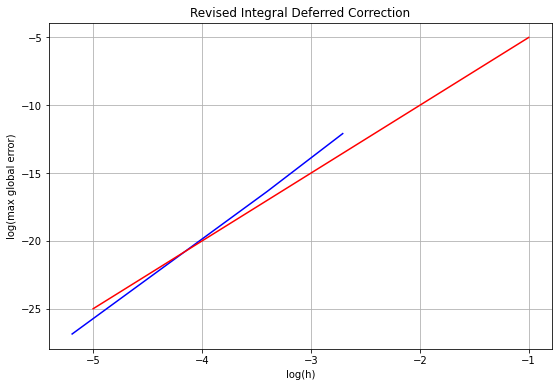

In [38]:
errorlist2 = []
stepsizelist2 = []

for i in [16,31,181]:   
    T = np.linspace(0, 2, i)
    K2 = RIDC(0,2,i-1,6,5,1,F)
    stepsizelist2.append(1/(i-1))
    m = [abs(K2[j] - func_sol(T[j])) for j in range(i)]
    errorlist2.append(max(m))
    
logerrorlist2 = [np.log(i) for i in errorlist2]
logstepsizelist2 = [np.log(i) for i in stepsizelist2]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2)
plt.plot([-5,-1], [-25,-5], 'r-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Revised Integral Deferred Correction')
plt.show()

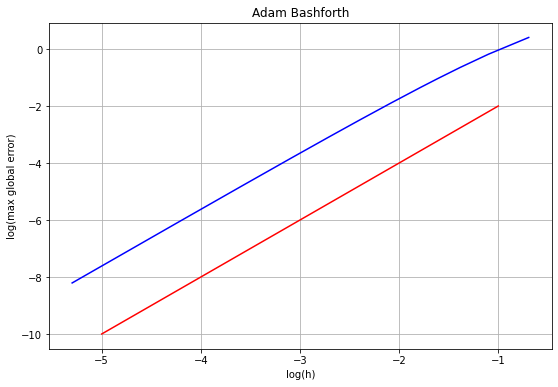

In [6]:
def Adam_b(T,f,y0):  #adam bashforth 2
    
    no_of_times = T.size                                                     
    Y = np.zeros(no_of_times)
    Y[0] = y0
    h = T[1] - T[0]
    for i in range(2):
        Y[i+1] = Y[i] + h*f(T[i],Y[i])
    for i in range(no_of_times-2):
        Y[i+2] = Y[i+1] + h*(3/2*f(T[i+1],Y[i+1]) - 1/2*f(T[i],Y[i]))
        
    return Y


errorlist2 = []
stepsizelist2 = []

for i in range(3,202):   
    T = np.linspace(0, 1, i)
    K3 = Adam_b(T,F,1)
    stepsizelist2.append(1/(i-1))
    m = [abs(K3[j] - func_sol(T[j])) for j in range(i)]
    errorlist2.append(max(m))
    
logerrorlist2 = [np.log(i) for i in errorlist2]
logstepsizelist2 = [np.log(i) for i in stepsizelist2]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2)
plt.plot([-5,-1], [-10,-2], 'r-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Adam Bashforth')
plt.show()

In [7]:
#revised integral deferred correction with Adam bashford prediction


def RIDC_adam1(a,b,N,p,K,y0,F):#Adam Bashforth
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function

    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1)
    sol_list[0] = y0
    T = np.zeros((J,K+1))
    times = np.linspace(a,b,N+1)
    for j in range(J):
        T[j,0:K+1] = times[j*K:j*K+K+1] #times
    Y = np.zeros((J,K+1))  #approx solution
    Y1 = np.zeros((J,K+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        for m in range(2):   #prediction
            Y[j,m+1] = Y[j,m] + h*F(T[j,m],Y[j,m]) #Adam Bashforth 2    
        for m in range(K-2):
            Y[j,m+2] = Y[j,m+1] + h*(3/2*F(T[j,m+1],Y[j,m+1]) - 1/2*F(T[j,m],Y[j,m]))
            
        
        for l in range(M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(M):  
                
                g = sum([S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])

                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g #solve error equation with forward Euler
            
            for m in range(M,K):
                
                g = sum([S[M-1,k]*F(T[j,m-M+k],Y[j,m-M+k]) for k in range(M+1)])
                
                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g  #solve error equation with forward Euler
                    
            Y[j,:] = Y1[j,:]
    
        sol_list[j*K+1:j*K+K+1] = Y1[j,1:K+1]
        if j!=J-1:           #set initial value for next iteration
            Y[j+1,0] = Y1[j,K]
            
    return sol_list



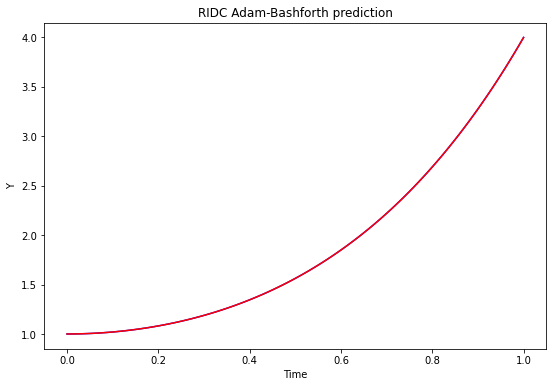

In [8]:
T1 = np.linspace(0,1,101)
K3 = RIDC_adam1(0,1,100,11,10,1,F)

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(T1, K3, 'b-', markersize=2)
plt.plot(T1, (1+T1**2)**2, 'r-', markersize=2)
#plt.plot(T1, K3, 'y-', markersize=2)
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.title('RIDC Adam-Bashforth prediction')
plt.show()

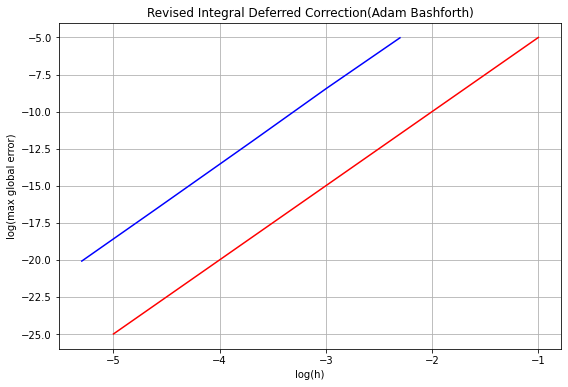

In [9]:
errorlist2 = []
stepsizelist2 = []

for i in [11,21,41,101,201]:   
    T = np.linspace(0, 2, i)
    K4 = RIDC_adam1(0,2,i-1,6,5,1,F)
    stepsizelist2.append(1/(i-1))
    m = [abs(K4[j] - func_sol(T[j])) for j in range(i)]
    errorlist2.append(max(m))
    
logerrorlist2 = [np.log(i) for i in errorlist2]
logstepsizelist2 = [np.log(i) for i in stepsizelist2]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2)
plt.plot([-5,-1], [-25,-5], 'r-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Revised Integral Deferred Correction(Adam Bashforth)')
plt.show()

In [10]:
#revised integral deferred correction Adam bashforth prediction and correction
#???

def RIDC_adam(a,b,N,p,K,y0,F):#Adam Bashforth
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function
    # p>3

    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1)
    sol_list[0] = y0
    T = np.zeros((J,K+1))
    times = np.linspace(a,b,N+1)
    for j in range(J):
        T[j,0:K+1] = times[j*K:j*K+K+1] #times
    Y = np.zeros((J,K+1))  #approx solution
    Y1 = np.zeros((J,K+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        for m in range(2):   #prediction
            Y[j,m+1] = Y[j,m] + h*F(T[j,m],Y[j,m]) #Adam Bashforth 2    
        for m in range(K-2):
            Y[j,m+2] = Y[j,m+1] + h*(3/2*F(T[j,m+1],Y[j,m+1]) - 1/2*F(T[j,m],Y[j,m]))
        
        print(Y[j,:])
        #####################################################################
        
        for l in range(M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(2):  
                a = 0
                g = sum([a + S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])  #Adam bashforth 2 correction
                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g 
            for m in range(M-2):
                a = 0
                g = sum([a + S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])
                Y1[j,m+2] = Y1[j,m+1] + h*(3/2*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m]))-1/2*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m]))) + h*g 
                
            if M!=K:    
                for m in range(M,K):
                    a = 0
                    g = sum([a + S[M-1,k]*F(T[j,m-M+k],Y[j,m-M+k]) for k in range(M+1)])
                    Y1[j,m+1] = Y1[j,m-1] + h*(3/2*(F(T[j,m-2],Y[j,m-2])-F(T[j,m-2],Y1[j,m-2]))-1/2*(F(T[j,m-2],Y[j,m-2])-F(T[j,m-2],Y1[j,m-2]))) + h*g 
                    
            Y[j,:] = Y1[j,:]
    
        sol_list[j*K+1:j*K+K+1] = Y1[j,1:K+1]
        if j!=J-1:           #set initial value for next iteration
            Y[j+1,0] = Y1[j,K]
            
    return sol_list



In [11]:
K4 = RIDC_adam(0,1,100,6,5,1,F)
K4,K,func_sol(T1)

[1.         1.         1.0006     1.00160036 1.00300168 0.        ]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


(array([1.        , 1.00016246, 1.00032493, 1.00094029, 1.0019253 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  